In [1]:
# Import data and libraries 

import pandas as pd
churn = pd.read_csv('/Users/babs/Desktop/MBA/Data Mining/Telco-Customer-Churn-1.csv')

In [2]:
churn.shape

(7032, 20)

In [3]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Perform label encoding
x = pd.get_dummies(churn.iloc[:, 0:19],drop_first = True)
y = churn.iloc[:,19]

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_churn = LabelEncoder()
y = labelencoder_churn.fit_transform(churn['Churn'].values)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [8]:
# Create logistic regression model
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 200)

# fit the model with data
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [9]:
coef = pd.DataFrame(logreg.coef_[0], index = x.columns, columns= ['Coefficients'])
coef

,Coefficients
tenure,-0.061972
MonthlyCharges,0.005115
TotalCharges,0.000316
gender_Male,-0.003691
SeniorCitizen_yes,0.259451
Partner_Yes,0.033542
Dependents_Yes,-0.230182
PhoneService_Yes,-0.515854
MultipleLines_No phone service,0.283578
MultipleLines_Yes,0.247112


In [10]:
# exponentiate log odds value 
import numpy as np
df = pd.DataFrame(np.exp(logreg.coef_)[0], index = x_train.columns, columns= ['odds'])
df.sort_values(by =['odds'], ascending = True)
# odds ratio < 1 indicates customer churn probability decreases

,odds
Contract_Two year,0.335853
Contract_One year,0.558250
PhoneService_Yes,0.596991
TechSupport_Yes,0.632631
OnlineSecurity_Yes,0.702235
PaymentMethod_Credit card (automatic),0.786318
Dependents_Yes,0.794389
OnlineBackup_Yes,0.812709
OnlineBackup_No internet service,0.923494
StreamingMovies_No internet service,0.923494


In [11]:
# Evaluate logistic regression model on the test set
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [13]:
from sklearn.metrics import accuracy_score
print('Accuracy::{:.3f}'.format(accuracy_score(y_test,y_pred)))

Accuracy::0.807


/Users/babs/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


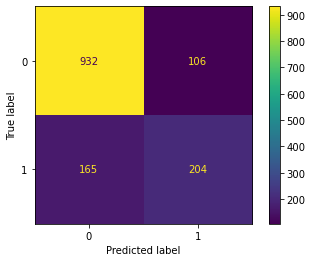

In [14]:
# Visualize confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg,x_test,y_test)

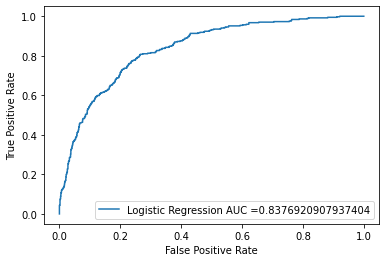

In [15]:
from matplotlib import pyplot 
from sklearn.metrics import roc_curve, roc_auc_score
# Keep probabilities for the positive outcomes only
y_pred_proba= logreg.predict_proba(x_test)[:,1]
fpr,tpr,_ = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)

pyplot.plot(fpr,tpr,label= 'Logistic Regression AUC ='+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# Show legend
pyplot.legend()
pyplot.show()